Lab 4

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_loader = DataLoader(torchvision.datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform), batch_size=64, shuffle=False)

# Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self, use_bn=False, use_dropout=False):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256) if use_bn else nn.Identity()
        self.dropout1 = nn.Dropout(0.5) if use_dropout else nn.Identity()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.bn1(self.fc1(x)))
        return self.fc2(self.dropout1(x))

def train_and_evaluate(model, epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    # Training
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            criterion(model(images), labels).backward()
            optimizer.step()
    
    # Evaluation
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            _, predicted = torch.max(model(images), 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    return 100 * correct / total

# Train and evaluate all models
models = [SimpleNN(), SimpleNN(use_bn=True), SimpleNN(use_dropout=True)]
labels = ["without BN & Dropout", "with Batch Normalization", "with Dropout"]

for model, label in zip(models, labels):
    accuracy = train_and_evaluate(model)
    print(f"Accuracy {label}: {accuracy:.2f}%")


C:\Users\Harini N\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:20<00:00, 493842.45it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 54717.09it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 993139.59it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 372626.48it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Accuracy without BN & Dropout: 97.69%
Accuracy with Batch Normalization: 97.79%
Accuracy with Dropout: 97.63%


Lab 5

Files already downloaded and verified
Files already downloaded and verified

Training with SGD Optimizer:
Epoch 1: Train Loss: 1.5125, Test Loss: 1.1984, Accuracy: 57.31%
Epoch 2: Train Loss: 1.0616, Test Loss: 1.0091, Accuracy: 64.89%
Epoch 3: Train Loss: 0.8682, Test Loss: 0.8776, Accuracy: 69.54%
Epoch 4: Train Loss: 0.7326, Test Loss: 0.8709, Accuracy: 69.51%
Epoch 5: Train Loss: 0.6226, Test Loss: 0.8329, Accuracy: 72.18%

Training with Adam Optimizer:
Epoch 1: Train Loss: 1.3425, Test Loss: 1.0797, Accuracy: 61.01%
Epoch 2: Train Loss: 0.9706, Test Loss: 0.9146, Accuracy: 67.96%
Epoch 3: Train Loss: 0.8043, Test Loss: 0.8565, Accuracy: 70.02%
Epoch 4: Train Loss: 0.6879, Test Loss: 0.8284, Accuracy: 71.16%
Epoch 5: Train Loss: 0.5835, Test Loss: 0.8588, Accuracy: 71.73%


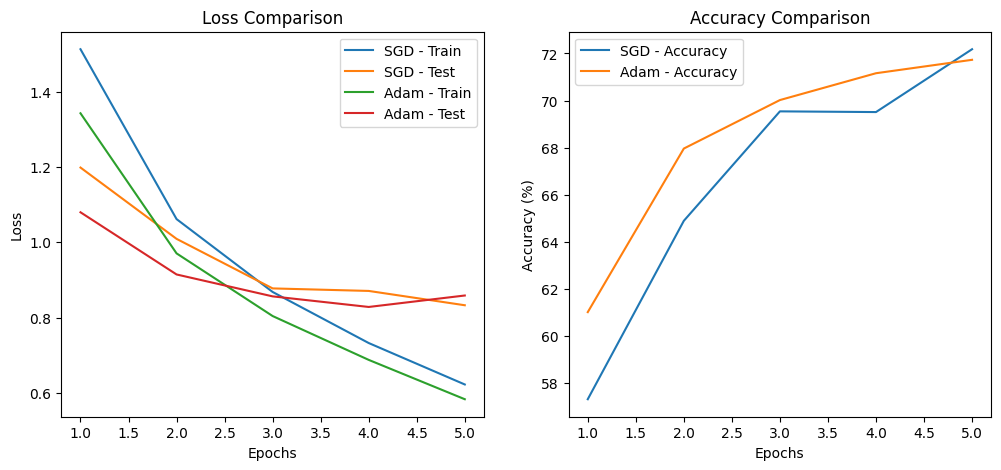

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = DataLoader(torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=transform), batch_size=64)

# Define CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

def train_and_evaluate(model, optimizer, epochs=5):
    criterion = nn.CrossEntropyLoss()
    train_losses, test_losses, test_accuracies = [], [], []
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            loss = criterion(model(images), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Testing
        model.eval()
        test_loss = correct = total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                test_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        # Store metrics
        train_losses.append(train_loss / len(train_loader))
        test_losses.append(test_loss / len(test_loader))
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        
        print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")
    
    return train_losses, test_losses, test_accuracies

# Train models with different optimizers
models = [SimpleCNN(), SimpleCNN()]
optimizers = [optim.SGD(models[0].parameters(), lr=0.01, momentum=0.9), 
              optim.Adam(models[1].parameters(), lr=0.001)]
labels = ['SGD', 'Adam']

results = []
for model, optimizer, label in zip(models, optimizers, labels):
    print(f"\nTraining with {label} Optimizer:")
    results.append(train_and_evaluate(model, optimizer))

# Plot comparison
epochs = range(1, 6)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, label in enumerate(labels):
    plt.plot(epochs, results[i][0], label=f'{label} - Train')
    plt.plot(epochs, results[i][1], label=f'{label} - Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

plt.subplot(1, 2, 2)
for i, label in enumerate(labels):
    plt.plot(epochs, results[i][2], label=f'{label} - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Comparison')

plt.show()

Lab 6

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train[..., None] / 255.0, x_test[..., None] / 255.0

# Simulate blurry inputs
def blur_images(images):
    return tf.image.resize(tf.image.resize(images, (14, 14)), (28, 28))

x_train_blur, x_test_blur = blur_images(x_train), blur_images(x_test)

# Simple U-Net model
def simple_unet(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)
    return models.Model(inputs, outputs)

# Compile and train
model = simple_unet((28, 28, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_blur, x_train, epochs=5, batch_size=64, validation_split=0.1)

# Predict on test samples
predicted = model.predict(x_test_blur[:5])

# Visualization
for i in range(5):
    plt.figure(figsize=(8, 2))
    for j, (title, img) in enumerate(zip(
        ["Blurry Input", "Ground Truth", "Predicted Mask"],
        [x_test_blur[i], x_test[i], predicted[i]]
    )):
        plt.subplot(1, 3, j + 1)
        plt.title(title)
        plt.imshow(np.squeeze(img), cmap='gray')
        plt.axis('off')
    plt.show()


ModuleNotFoundError: No module named 'tensorflow'

Lab 12

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset

In [6]:
transform = transforms.Compose([transforms.ToTensor()])
train_data=Subset(datasets.MNIST('./data',train= True, download = True, transform = transform), range(200))
test_data=Subset(datasets.MNIST('./data',train= False, download = True, transform = transform), range(50))

In [8]:
train_loader=DataLoader(train_data, shuffle = True, batch_size = 10)
test_loader = DataLoader(test_data, batch_size = 10)

In [16]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28, 256), nn.ReLU(), nn.Linear(256, 64), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(64,256), nn.ReLU(), nn.Linear(256, 28*28), nn.Sigmoid())

    def forward(self, x):
        return self.decoder(self.encoder(x))

In [17]:
model = AutoEncoder()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()

In [19]:
for epoch in range(10):
    model.train()
    train_loss = 0.0
    for img,_ in train_loader:
        img =img.view(img.size(0), -1)
        loss = criterion(model(img),img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    avg_train = train_loss/len(train_loader)
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for img,_ in test_loader:
            img = img.view(img.size(0),-1)
            loss = criterion(model(img),img)
            test_loss+=loss.item()
        avg_test = test_loss / len(test_loader)
    print(f"epoch: {epoch + 1}, train loss: {avg_train:.4f}, test loss: {avg_test:.4f}")

epoch: 1, train loss: 0.0637, test loss: 0.0595
epoch: 2, train loss: 0.0555, test loss: 0.0548
epoch: 3, train loss: 0.0503, test loss: 0.0519
epoch: 4, train loss: 0.0464, test loss: 0.0495
epoch: 5, train loss: 0.0433, test loss: 0.0480
epoch: 6, train loss: 0.0397, test loss: 0.0452
epoch: 7, train loss: 0.0365, test loss: 0.0444
epoch: 8, train loss: 0.0351, test loss: 0.0430
epoch: 9, train loss: 0.0335, test loss: 0.0443
epoch: 10, train loss: 0.0332, test loss: 0.0458


Lab 11

In [21]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super().__init__()
        assert embed_size % heads == 0
        self.head_dim = embed_size // heads
        self.heads = heads
        self.embed_size = embed_size
        self.values = nn.Linear(embed_size, embed_size)
        self.keys = nn.Linear(embed_size, embed_size)
        self.queries = nn.Linear(embed_size, embed_size)
        self.fc_out = nn.Linear(embed_size, embed_size)

    def forward(self, value, key, query, mask=None):
        N, seq_len = query.shape[0], query.shape[1]

        def transform(x, proj):
            x = proj(x)
            return x.view(N, -1, self.heads, self.head_dim).transpose(1, 2)

        V, K, Q = map(lambda x, p: transform(x, p), [value, key, query], [self.values, self.keys, self.queries])
        energy = (Q @ K.transpose(-2, -1)) / (self.head_dim ** 0.5)

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy, dim=-1)
        out = (attention @ V).transpose(1, 2).reshape(N, seq_len, self.embed_size)
        return self.fc_out(out)

# Example usage
attention = MultiHeadAttention(embed_size=128, heads=8)
x = torch.rand(2, 10, 128)  # (batch, seq_len, embed_dim)
output = attention(x, x, x)
print(output.shape)  # → torch.Size([2, 10, 128])


torch.Size([2, 10, 128])


Lab 10

In [23]:
import torch, torch.nn as nn, torch.optim as optim

# Prepare character-level data
text = "hello world, this is a simple text generation using LSTMs."
chars = sorted(set(text))

char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for c, i in char2idx.items()}
seq_len = 10

# Create input-output sequences
X = [[char2idx[c] for c in text[i:i+seq_len]] for i in range(len(text) - seq_len)]
Y = [char2idx[text[i+seq_len]] for i in range(len(text) - seq_len)]

X, Y = torch.tensor(X), torch.tensor(Y)

# Define LSTM model
class TextLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x, _ = self.lstm(self.embed(x))
        return self.fc(x[:, -1])

# Model, loss, optimizer
vocab_size, embed_size, hidden_size = len(chars), 16, 128
model = TextLSTM(vocab_size, embed_size, hidden_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    optimizer.zero_grad()
    loss = criterion(model(X), Y)
    loss.backward()
    optimizer.step()

# Text generation function
def generate(start, length=50):
    model.eval()
    seq = [char2idx[c] for c in start]
    result = start
    for _ in range(length):
        inp = torch.tensor([seq], dtype=torch.long)
        with torch.no_grad():
            pred = torch.argmax(model(inp), dim=1).item()
        result += idx2char[pred]
        seq = seq[1:] + [pred]
    return result

# Output
print("\n\nGenerated Text:\n\n", generate("hello wor", 50))




Generated Text:

 hello word, this is a simple tex generation using LSTMs.. t


Lab 9

In [24]:
import torch, torch.nn as nn, torch.optim as optim

# Simple RNN model for binary classification
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)       # (batch, seq_len, hidden_size)
        return self.fc(out[:, -1])  # Use last time step's output

# Hyperparameters
input_size, hidden_size, output_size = 8, 32, 1
seq_len, batch_size = 10, 16

# Random input and target
X = torch.randn(batch_size, seq_len, input_size)
y = torch.randint(0, 2, (batch_size, 1)).float()

# Model, loss, optimizer
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/10] Loss: {loss.item():.4f}")


Epoch [1/10] Loss: 0.6799
Epoch [2/10] Loss: 0.6710
Epoch [3/10] Loss: 0.6623
Epoch [4/10] Loss: 0.6537
Epoch [5/10] Loss: 0.6452
Epoch [6/10] Loss: 0.6369
Epoch [7/10] Loss: 0.6286
Epoch [8/10] Loss: 0.6204
Epoch [9/10] Loss: 0.6123
Epoch [10/10] Loss: 0.6042
